<a href="https://colab.research.google.com/github/vaishak-krishnan/Deep-Learning-Architectures/blob/main/DenseNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow matplotlib seaborn


In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[]

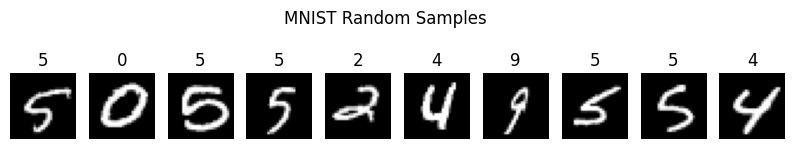

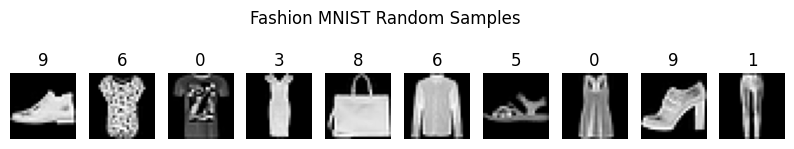

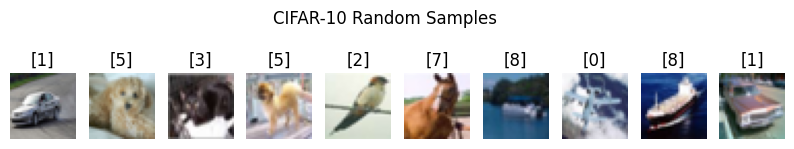

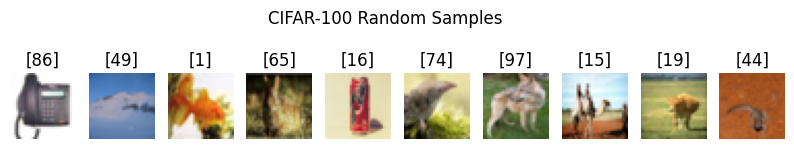

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

# Load datasets
mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
cifar10 = tf.keras.datasets.cifar10
cifar100 = tf.keras.datasets.cifar100

(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()
(x_train_cifar100, y_train_cifar100), (x_test_cifar100, y_test_cifar100) = cifar100.load_data()

# Function to plot 10 random samples from a dataset
def plot_random_samples(x_data, y_data, title, num_samples=10):
    indices = random.sample(range(x_data.shape[0]), num_samples)
    samples = x_data[indices]
    labels = y_data[indices]

    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(samples[i], cmap='gray' if len(samples[i].shape) == 2 else None)
        plt.title(labels[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display 10 random samples from each dataset
plot_random_samples(x_train_mnist, y_train_mnist, "MNIST Random Samples")
plot_random_samples(x_train_fashion, y_train_fashion, "Fashion MNIST Random Samples")
plot_random_samples(x_train_cifar10, y_train_cifar10, "CIFAR-10 Random Samples")
plot_random_samples(x_train_cifar100, y_train_cifar100, "CIFAR-100 Random Samples")



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 457s 216ms/step - accuracy: 0.9274 - loss: 0.2820 - val_accuracy: 0.9617 - val_loss: 0.1219
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 366s 195ms/step - accuracy: 0.9803 - loss: 0.0728 - val_accuracy: 0.9899 - val_loss: 0.0342
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 368s 196ms/step - accuracy: 0.9871 - loss: 0.0443 - val_accuracy: 0.9866 - val_loss: 0.0461
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 367s 196ms/step - accuracy: 0.9882 - loss: 0.0422 - val_accuracy: 0.9873 - val_loss: 0.0442
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 368s 196ms/step - accuracy: 0.9888 - loss: 0.0388 - val_accuracy: 0.9846 - val_loss: 0.0629
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 380s 203ms/step - accuracy: 0.9900 - loss: 0.0335 - val_accuracy: 0.9924 - val_loss: 0.0280
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 379s 202ms/step - accuracy: 0.9921 - loss: 0.0246 - val_accuracy: 0.9929 - val_loss: 0.0240
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 368s 196ms/step - a

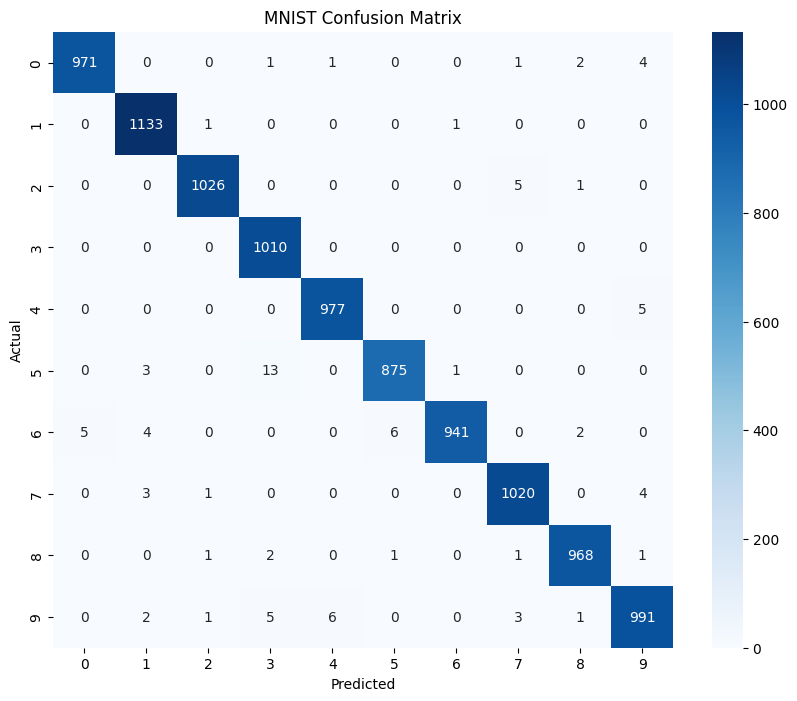

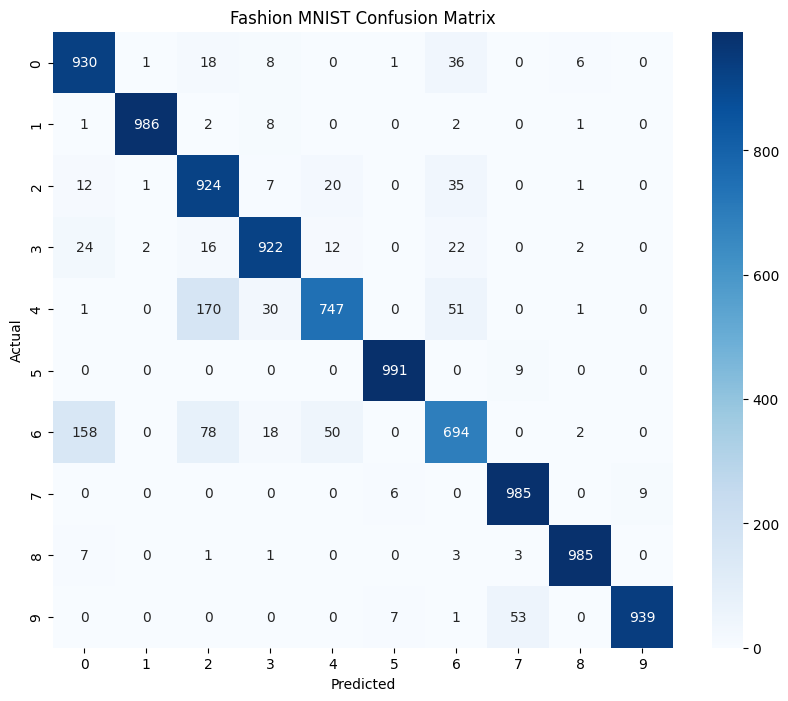

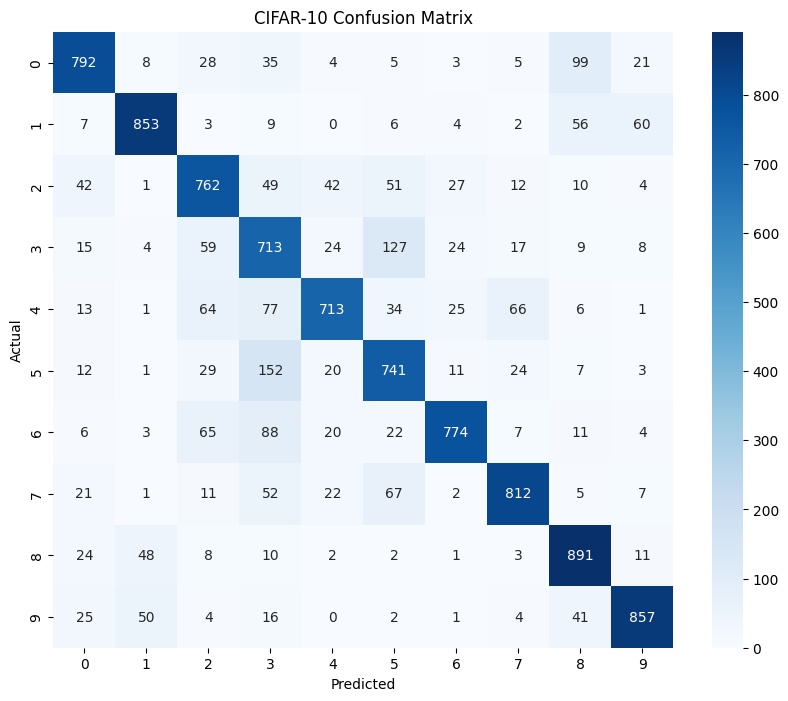

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow.keras.backend as K

# Preprocess datasets
def preprocess_data(x_train, y_train, x_test, y_test, num_classes, target_size=(32, 32)):
    # Resize images to target size
    x_train = tf.image.resize(x_train, target_size)
    x_test = tf.image.resize(x_test, target_size)

    # Normalize the images
    x_train = preprocess_input(x_train)
    x_test = preprocess_input(x_test)
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test

# Preprocessing each dataset
num_classes_mnist = 10
num_classes_fashion = 10
num_classes_cifar10 = 10
num_classes_cifar100 = 100

x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist = preprocess_data(
    tf.stack([x_train_mnist]*3, axis=-1), y_train_mnist, tf.stack([x_test_mnist]*3, axis=-1), y_test_mnist, num_classes_mnist)
x_train_fashion, y_train_fashion, x_test_fashion, y_test_fashion = preprocess_data(
    tf.stack([x_train_fashion]*3, axis=-1), y_train_fashion, tf.stack([x_test_fashion]*3, axis=-1), y_test_fashion, num_classes_fashion)
x_train_cifar10, y_train_cifar10, x_test_cifar10, y_test_cifar10 = preprocess_data(
    x_train_cifar10, y_train_cifar10, x_test_cifar10, y_test_cifar10, num_classes_cifar10)
x_train_cifar100, y_train_cifar100, x_test_cifar100, y_test_cifar100 = preprocess_data(
    x_train_cifar100, y_train_cifar100, x_test_cifar100, y_test_cifar100, num_classes_cifar100)

# Function to create and compile the DenseNet model
def create_densenet_model(input_shape, num_classes):
    K.clear_session()  # Clear previous models from memory
    base_model = DenseNet121(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))
    x = Flatten()(base_model.output)
    x = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Training and evaluating the model
def train_and_evaluate(x_train, y_train, x_test, y_test, num_classes):
    input_shape = x_train.shape[1:]
    model = create_densenet_model(input_shape, num_classes)
    model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    report = classification_report(y_true, y_pred_classes, output_dict=True)
    return loss, accuracy, report, confusion_matrix(y_true, y_pred_classes)

# Evaluate MNIST
loss_mnist, accuracy_mnist, report_mnist, cm_mnist = train_and_evaluate(
    x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, num_classes_mnist)
# Evaluate Fashion MNIST
loss_fashion, accuracy_fashion, report_fashion, cm_fashion = train_and_evaluate(
    x_train_fashion, y_train_fashion, x_test_fashion, y_test_fashion, num_classes_fashion)
# Evaluate CIFAR-10
loss_cifar10, accuracy_cifar10, report_cifar10, cm_cifar10 = train_and_evaluate(
    x_train_cifar10, y_train_cifar10, x_test_cifar10, y_test_cifar10, num_classes_cifar10)
# Evaluate CIFAR-100
loss_cifar100, accuracy_cifar100, report_cifar100, cm_cifar100 = train_and_evaluate(
    x_train_cifar100, y_train_cifar100, x_test_cifar100, y_test_cifar100, num_classes_cifar100)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrices (excluding CIFAR-100)
plot_confusion_matrix(cm_mnist, "MNIST Confusion Matrix")
plot_confusion_matrix(cm_fashion, "Fashion MNIST Confusion Matrix")
plot_confusion_matrix(cm_cifar10, "CIFAR-10 Confusion Matrix")


         Dataset  Accuracy  Precision  Recall  F1 Score      Loss
0          MNIST    0.9912   0.991237  0.9912  0.991196  0.027056
1  Fashion MNIST    0.9103   0.913363  0.9103  0.909343  0.248037
2       CIFAR-10    0.7908   0.798478  0.7908  0.792640  0.630209
3      CIFAR-100    0.5069   0.529922  0.5069  0.498673  2.195358


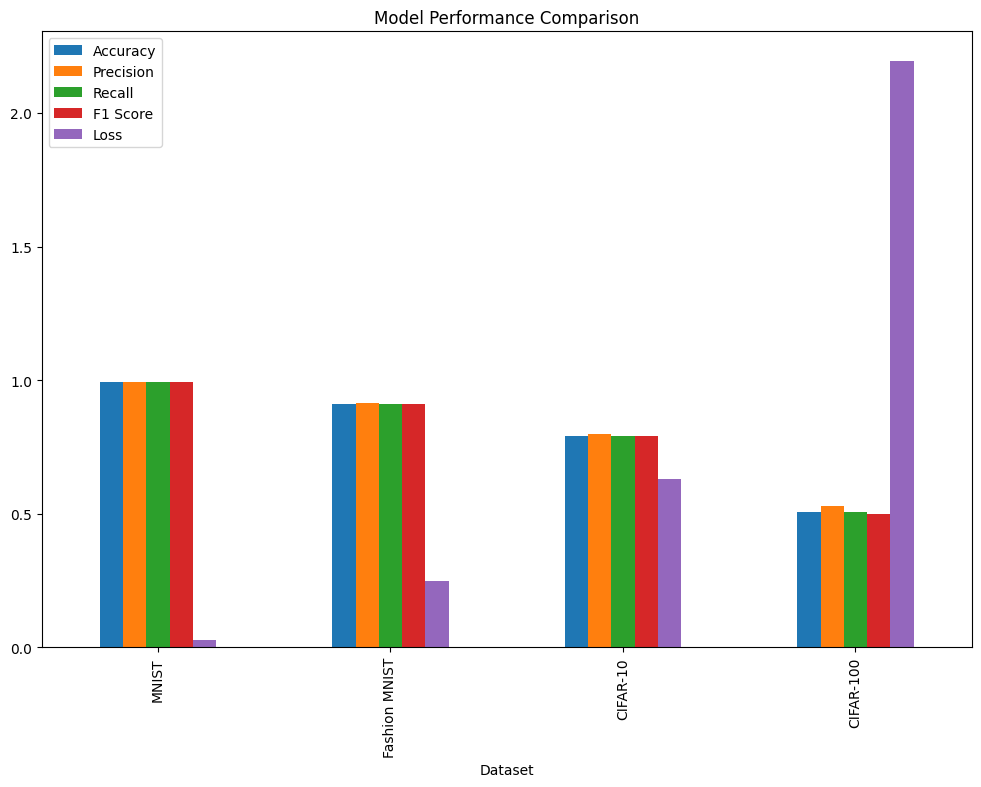

In [ ]:
import pandas as pd

# Function to extract metrics from the report
def extract_metrics(report):
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    return precision, recall, f1_score

# Extract metrics for each dataset
precision_mnist, recall_mnist, f1_mnist = extract_metrics(report_mnist)
precision_fashion, recall_fashion, f1_fashion = extract_metrics(report_fashion)
precision_cifar10, recall_cifar10, f1_cifar10 = extract_metrics(report_cifar10)
precision_cifar100, recall_cifar100, f1_cifar100 = extract_metrics(report_cifar100)

# Create a DataFrame for the report
report_data = {
    "Dataset": ["MNIST", "Fashion MNIST", "CIFAR-10", "CIFAR-100"],
    "Accuracy": [accuracy_mnist, accuracy_fashion, accuracy_cifar10, accuracy_cifar100],
    "Precision": [precision_mnist, precision_fashion, precision_cifar10, precision_cifar100],
    "Recall": [recall_mnist, recall_fashion, recall_cifar10, recall_cifar100],
    "F1 Score": [f1_mnist, f1_fashion, f1_cifar10, f1_cifar100],
    "Loss": [loss_mnist, loss_fashion, loss_cifar10, loss_cifar100]
}

report_df = pd.DataFrame(report_data)
print(report_df)

# Plot the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Loss']
report_df.plot(x='Dataset', y=metrics, kind='bar', figsize=(12, 8), title='Model Performance Comparison')
plt.show()
